## 📌 Introduction

This notebook presents a Business Intelligence analysis of the Telco Customer Churn dataset. The goal is to clean the data, simulate an ETL process, perform exploratory data analysis, and derive actionable business insights related to customer churn.

### 🔗 Dataset Path C:\Users\Sunrise\Desktop\Semester 4th\Business Intelligence\telco.csv

In [1]:
import pandas as pd

# Use raw string (r"") to avoid issues with backslashes
file_path = r"C:\Users\Sunrise\Desktop\Semester 4th\Business Intelligence\telco.csv"
df = pd.read_csv(file_path)



In [2]:
# Preview the data
df.head()

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,...,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,...,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,...,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,California,...,0,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,United States,California,...,0,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges


## 🧼 Data Cleaning
 Clean the dataset by handling missing values, encoding categorical variables, removing duplicates, and detecting outliers.

In [3]:
df.isnull().sum()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Under 30                           7043 non-null   object 
 4   Senior Citizen                     7043 non-null   object 
 5   Married                            7043 non-null   object 
 6   Dependents                         7043 non-null   object 
 7   Number of Dependents               7043 non-null   int64  
 8   Country                            7043 non-null   object 
 9   State                              7043 non-null   object 
 10  City                               7043 non-null   object 
 11  Zip Code                           7043 non-null   int64

In [4]:
# Convert Total Charges to numeric
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')
df['Total Charges'].fillna(df['Total Charges'].median(), inplace=True)

C:\Users\Sunrise\AppData\Local\Temp\ipykernel_20552\2878536005.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Total Charges'].fillna(df['Total Charges'].median(), inplace=True)


In [5]:
df.drop_duplicates(inplace=True)

In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Male=1, Female=0
df['Churn Label'] = le.fit_transform(df['Churn Label'])  # Yes=1, No=0

# One-hot encode multi-class columns
df = pd.get_dummies(df, columns=['Internet Type', 'Contract', 'Payment Method', 'Offer'], drop_first=True)

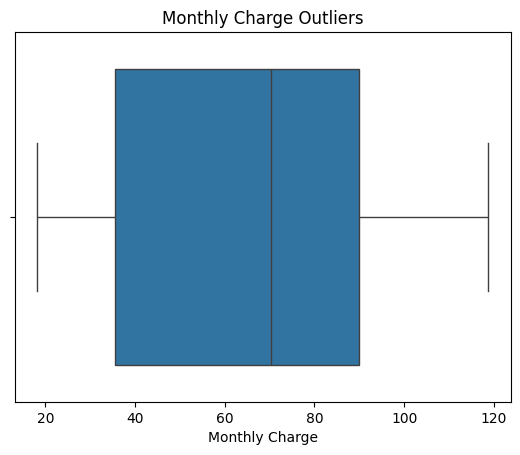

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['Monthly Charge'])
plt.title('Monthly Charge Outliers')
plt.show()

# IQR method
Q1 = df['Monthly Charge'].quantile(0.25)
Q3 = df['Monthly Charge'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df = df[(df['Monthly Charge'] >= lower) & (df['Monthly Charge'] <= upper)]

## 🔄 ETL Process

- **Extract**: Loaded from local CSV
- **Transform**: Cleaned, encoded, and normalized
- **Load**: Save cleaned data for BI tools

In [8]:
df.to_csv('Cleaned_Telco_Churn.csv', index=False)

## 📊 Exploratory Data Analysis
Exploring churn patterns across demographics, services, and financial metrics.

In [9]:
df.describe()

,Gender,Age,Number of Dependents,Zip Code,Latitude,Longitude,Population,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,...,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Churn Label,Churn Score,CLTV
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,46.509726,0.468692,93486.070567,36.197455,-119.756684,22139.603294,1.951867,32.386767,22.958954,...,64.761692,2280.381264,1.962182,6.860713,749.099262,3034.379056,3.244924,0.265370,58.505040,4400.295755
std,0.500013,16.750352,0.962802,1856.767505,2.468929,2.154425,21152.392837,3.001199,24.542061,15.448113,...,30.090047,2266.220462,7.902614,25.104978,846.660055,2865.204542,1.201657,0.441561,21.170031,1183.057152
min,0.000000,19.000000,0.000000,90001.000000,32.555828,-124.301372,11.000000,0.000000,1.000000,0.000000,...,18.250000,18.800000,0.000000,0.000000,0.000000,21.360000,1.000000,0.000000,5.000000,2003.000000
25%,0.000000,32.000000,0.000000,92101.000000,33.990646,-121.788090,2344.000000,0.000000,9.000000,9.210000,...,35.500000,400.150000,0.000000,0.000000,70.545000,605.610000,3.000000,0.000000,40.000000,3469.000000
50%,1.000000,46.000000,0.000000,93518.000000,36.205465,-119.595293,17554.000000,0.000000,29.000000,22.890000,...,70.350000,1394.550000,0.000000,0.000000,401.440000,2108.640000,3.000000,0.000000,61.000000,4527.000000
75%,1.000000,60.000000,0.000000,95329.000000,38.161321,-117.969795,36125.000000,3.000000,55.000000,36.395000,...,89.850000,3786.600000,0.000000,0.000000,1191.100000,4801.145000,4.000000,1.000000,75.500000,5380.500000
max,1.000000,80.000000,9.000000,96150.000000,41.962127,-114.192901,105285.000000,11.000000,72.000000,49.990000,...,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000,5.000000,1.000000,96.000000,6500.000000


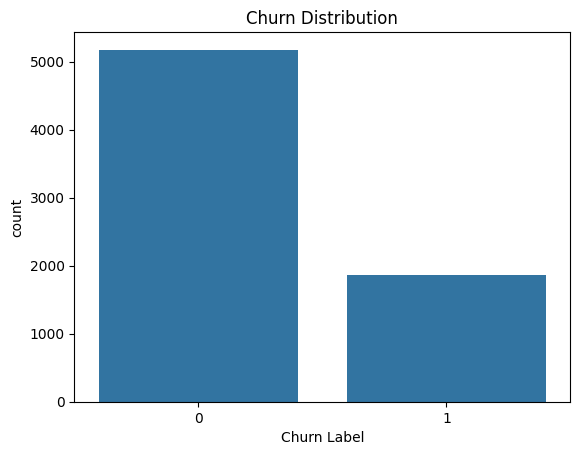

In [10]:
sns.countplot(x='Churn Label', data=df)
plt.title('Churn Distribution')
plt.show()

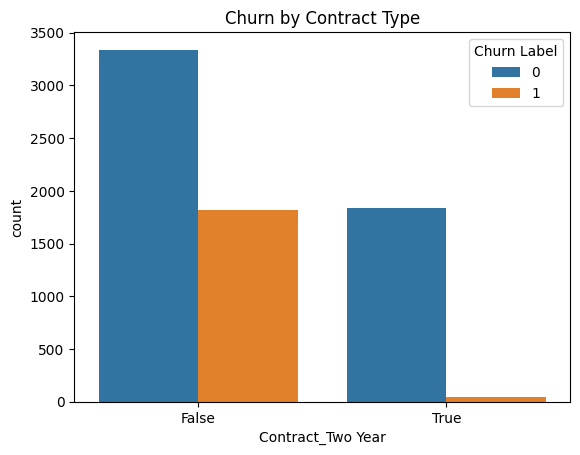

In [11]:
sns.countplot(x='Contract_Two Year', hue='Churn Label', data=df)
plt.title('Churn by Contract Type')
plt.show()

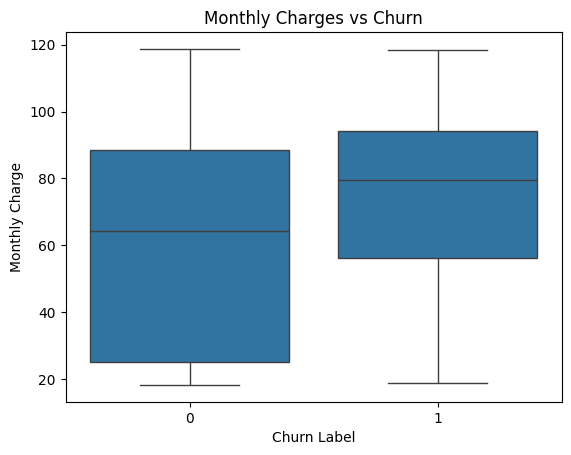

In [12]:
sns.boxplot(x='Churn Label', y='Monthly Charge', data=df)
plt.title('Monthly Charges vs Churn')
plt.show()

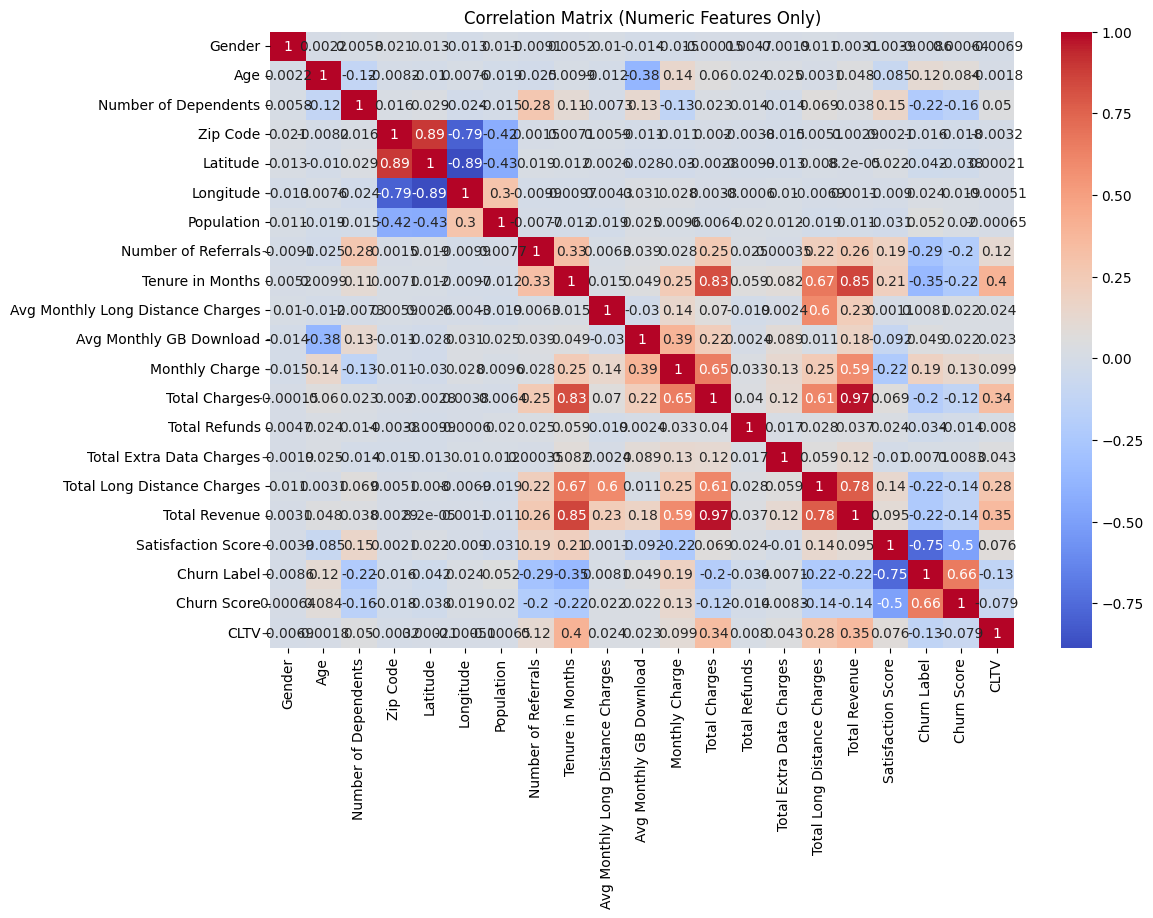

In [14]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Plot correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Numeric Features Only)')
plt.show()

## 💡 Key Insights

1. Customers with **month-to-month contracts** show the highest churn.
2. **Higher monthly charges** are associated with increased churn.
3. **Fiber optic internet users** churn more than DSL users.
4. **Tenure** is inversely related to churn — loyal customers stay longer.
5. **Electronic check payments** correlate with higher churn rates.